In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean as cm
from mpl_toolkits.basemap import Basemap, shiftgrid

%matplotlib inline

/home/eolson/anaconda3/envs/temp/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/eolson/anaconda3/envs/temp/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as b:
    bathy=b.variables['Bathymetry'][:]
    nav_lon=b.variables['nav_lon'][:]
    nav_lat=b.variables['nav_lat'][:]


In [3]:
lonmin=np.min(nav_lon)-.01
lonmax=np.max(nav_lon)+.01
latmin=np.min(nav_lat)-.01
latmax=np.max(nav_lat)+.01
print(lonmin,lonmax,latmin,latmax)

-126.410291443 -121.308351746 46.849664917 51.114801178


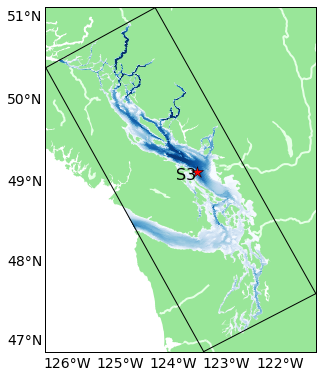

In [7]:
fig = plt.figure(figsize=(6,6))
fig.patch.set_facecolor('none')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')

p=m.pcolor(nav_lon,nav_lat,bathy,latlon=True,cmap='Blues')
p2=m.plot(nav_lon[0,:],nav_lat[0,:],'k-',latlon=True)
p2=m.plot(nav_lon[-1,:],nav_lat[-1,:],'k-',latlon=True)
p2=m.plot(nav_lon[:,0],nav_lat[:,0],'k-',latlon=True)
p2=m.plot(nav_lon[:,-1],nav_lat[:,-1],'k-',latlon=True)

m.fillcontinents(color=(.6,.9,.6),lake_color=(.9,1,.9))
m.drawrivers(color=(.9,1,.9),linewidth=2)

m.drawparallels(np.arange(np.round(latmin),np.round(latmax)+1,1),labels=[1,0,0,0], linewidth=0.0,fontsize=14)
m.drawmeridians(np.arange(np.round(lonmin),np.round(lonmax)+1,1),labels=[0,0,0,1], linewidth=0.0,fontsize=14)

m.plot(-123.559,49.125,'r*',latlon=True,markersize=12)
x,y = m(-123.559-.4,49.125-.1)
plt.text(x,y,'S3',size=16)

#fig.savefig('/home/eolson/pyCode/notebooks/figs/newBathy_green.png',dpi=200)
#fig.savefig('/home/eolson/pyCode/notebooks/figs/newBathy_green.eps',dpi=200)
#fig.savefig('/home/eolson/pyCode/notebooks/figs/mapLabeled.pdf')

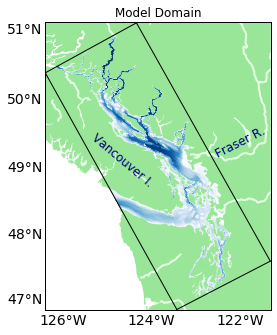

In [5]:
fig = plt.figure(figsize=(5,5))
fig.patch.set_facecolor('none')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')

p=m.pcolor(nav_lon,nav_lat,bathy,latlon=True,cmap='Blues')
p2=m.plot(nav_lon[0,:],nav_lat[0,:],'k-',latlon=True)
p2=m.plot(nav_lon[-1,:],nav_lat[-1,:],'k-',latlon=True)
p2=m.plot(nav_lon[:,0],nav_lat[:,0],'k-',latlon=True)
p2=m.plot(nav_lon[:,-1],nav_lat[:,-1],'k-',latlon=True)

m.fillcontinents(color=(.6,.9,.6),lake_color=(.9,1,.9))
m.drawrivers(color=(.9,1,.9),linewidth=2)

m.drawparallels(np.arange(np.round(latmin),np.round(latmax)+1,1),labels=[1,0,0,0], linewidth=0.0,fontsize=14)
m.drawmeridians(np.arange(np.round(lonmin),np.round(lonmax)+1,2),labels=[0,0,0,1], linewidth=0.0,fontsize=14)

x,y = m(-125.4,49.4)
plt.text(x,y,'Vancouver I.',size=12, rotation=-40.0,color='navy')
x,y = m(-122.6,49.5)
plt.text(x,y,'Fraser R.',size=12, rotation = 27.0,color='navy')
plt.title('Model Domain')

fig.savefig('/home/eolson/pyCode/notebooks/figs/newBathy_greenNoS3.png',dpi=400,transparent=True)
fig.savefig('/home/eolson/pyCode/notebooks/figs/newBathy_greenNoS3.eps',dpi=400,transparent=True)
#fig.savefig('/home/eolson/pyCode/notebooks/figs/mapLabeled.pdf')

NameError: name 'topoin' is not defined

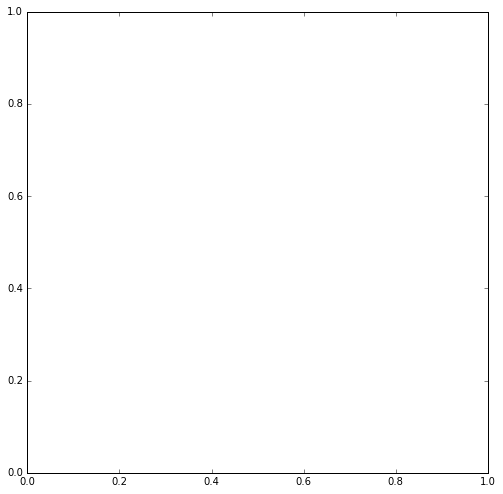

In [6]:
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('none')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax-.4,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
topo2=np.where(topodat<0,-topodat,0)
im = m.imshow(topo2,cmap='Blues',clim=(0, 200))#
# draw coastlines and political boundaries.
#m.drawcoastlines()
# draw parallels and meridians.
# label on left and bottom of map.
#parallels = np.arange(30.,70.,10.)
#m.drawparallels(parallels,labels=[1,0,0,1],size=16)
#meridians = np.arange(-150.,-80.,10.)
#m.drawmeridians(meridians,labels=[0,0,0,1],size=16)
m.fillcontinents(color=(.6,.9,.6),lake_color=(.9,1,.9))
m.drawrivers(color=(.9,1,.9),linewidth=2)
#x,y = m(-121.9, 49.7)
#plt.text(x,y,'Fraser\n River',size=20,fontname='Times New Roman')
#x,y = m(-124.8, 48.1)
#plt.text(x,y,'Strait of\n Juan de\n Fuca',size=20,fontname='Times New Roman')
#x,y = m(-124.2, 49.1)
#plt.text(x,y,'Strait of\n Georgia',size=20,fontname='Times New Roman')
#x,y = m(-123.5, 48.25)
#plt.text(x,y,' Gulf/\n San Juan\n Islands',size=20,fontname='Times New Roman')
#x,y = m(-126.1, 50.5)
#xt,yt=m(-126.5,50.8)
#ax.annotate('Johnstone\n Strait', xy=(x, y), xytext=(xt, yt), size=20,
#            arrowprops=dict(facecolor='black'),fontname='Times New Roman')#, shrink=0.05


fig.savefig('/home/eolson/pyCode/notebooks/figs/newBathy_green.png')
#fig.savefig('/home/eolson/pyCode/notebooks/figs/mapLabeled.pdf')